In [1]:
import pandas as pd
import torch
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pathlib
from IPython.display import display, Image
import cv2

In [2]:
%cd /scratch/xw10/jj8584

/scratch/xw10/jj8584


/scratch/sa4/test/miniconda3/envs/TEST4/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
pwd

'/scratch/xw10/jj8584'

In [4]:
baseline_model = YOLO('yolov9c.pt')

In [5]:
params_baseline  = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov9c.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
}

In [6]:
baseline_results = baseline_model.train(**params_baseline)

New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.133      11.64      2.636        246        416: 100%|██████████| 48/48 [00:09<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         73        967          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.21G      3.103      2.766      2.499        266        416: 100%|██████████| 48/48 [00:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.44it/s]

                   all         73        967          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.971      2.698      2.432        224        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         73        967     0.0132      0.274     0.0522     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.18G      2.667       2.61      2.376        255        416: 100%|██████████| 48/48 [00:07<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]

                   all         73        967     0.0032     0.0216    0.00185   0.000506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.22G      2.463      2.551      2.224        329        416: 100%|██████████| 48/48 [00:07<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         73        967   0.000463    0.00122   0.000233   0.000109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.388      2.525       2.13        230        416: 100%|██████████| 48/48 [00:07<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]

                   all         73        967    0.00407     0.0328    0.00377   0.000654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.18G      2.308      2.364      2.045        196        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]

                   all         73        967       0.24      0.371      0.254      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.16G      2.208      2.162      2.035        341        416: 100%|██████████| 48/48 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]

                   all         73        967     0.0534      0.446      0.126     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.17G      2.119      1.987      2.004        296        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.29it/s]

                   all         73        967      0.696      0.353      0.343      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.034      1.919      1.975        251        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.10it/s]

                   all         73        967    0.00581     0.0121    0.00546    0.00225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       5.2G      1.929      1.772      1.911        331        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]

                   all         73        967      0.166      0.343      0.169     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.21G      1.877       1.72      1.848        326        416: 100%|██████████| 48/48 [00:07<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]

                   all         73        967     0.0212      0.529     0.0418     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.18G      1.804      1.663      1.807        287        416: 100%|██████████| 48/48 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         73        967      0.241      0.528      0.175      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.18G      1.768        1.6      1.771        327        416: 100%|██████████| 48/48 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.42it/s]

                   all         73        967      0.241      0.528      0.175      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      1.719      1.541      1.727        221        416: 100%|██████████| 48/48 [00:07<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.29it/s]

                   all         73        967     0.0098    0.00846    0.00666     0.0032


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.18G      1.597      1.484      1.727        152        416: 100%|██████████| 48/48 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]

                   all         73        967      0.748      0.485      0.642      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.17G      1.597      1.441       1.73        177        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]

                   all         73        967      0.526      0.227      0.257      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G      1.553      1.341      1.704        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]

                   all         73        967      0.776      0.408      0.573      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G      1.523      1.294       1.67        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]

                   all         73        967      0.836      0.435      0.829       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.17G      1.505      1.236      1.641        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         73        967        0.8      0.531      0.721      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G      1.489      1.223       1.64        147        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]

                   all         73        967      0.698      0.481      0.802      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.18G      1.467       1.18      1.625        165        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         73        967      0.786      0.571      0.824      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      1.436      1.147      1.599        159        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         73        967      0.793      0.578      0.845      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.18G      1.428      1.132      1.595        186        416: 100%|██████████| 48/48 [00:07<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]

                   all         73        967      0.797      0.567      0.855      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.426      1.139      1.589        201        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]

                   all         73        967      0.807      0.558      0.854      0.526



25 epochs completed in 0.062 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]


                   all         73        967      0.807      0.558      0.853      0.526
             Platelets         73         76      0.845      0.789       0.85      0.372
                   RBC         73        819      0.577      0.867      0.797      0.522
                   WBC         73         72          1     0.0176      0.913      0.685
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


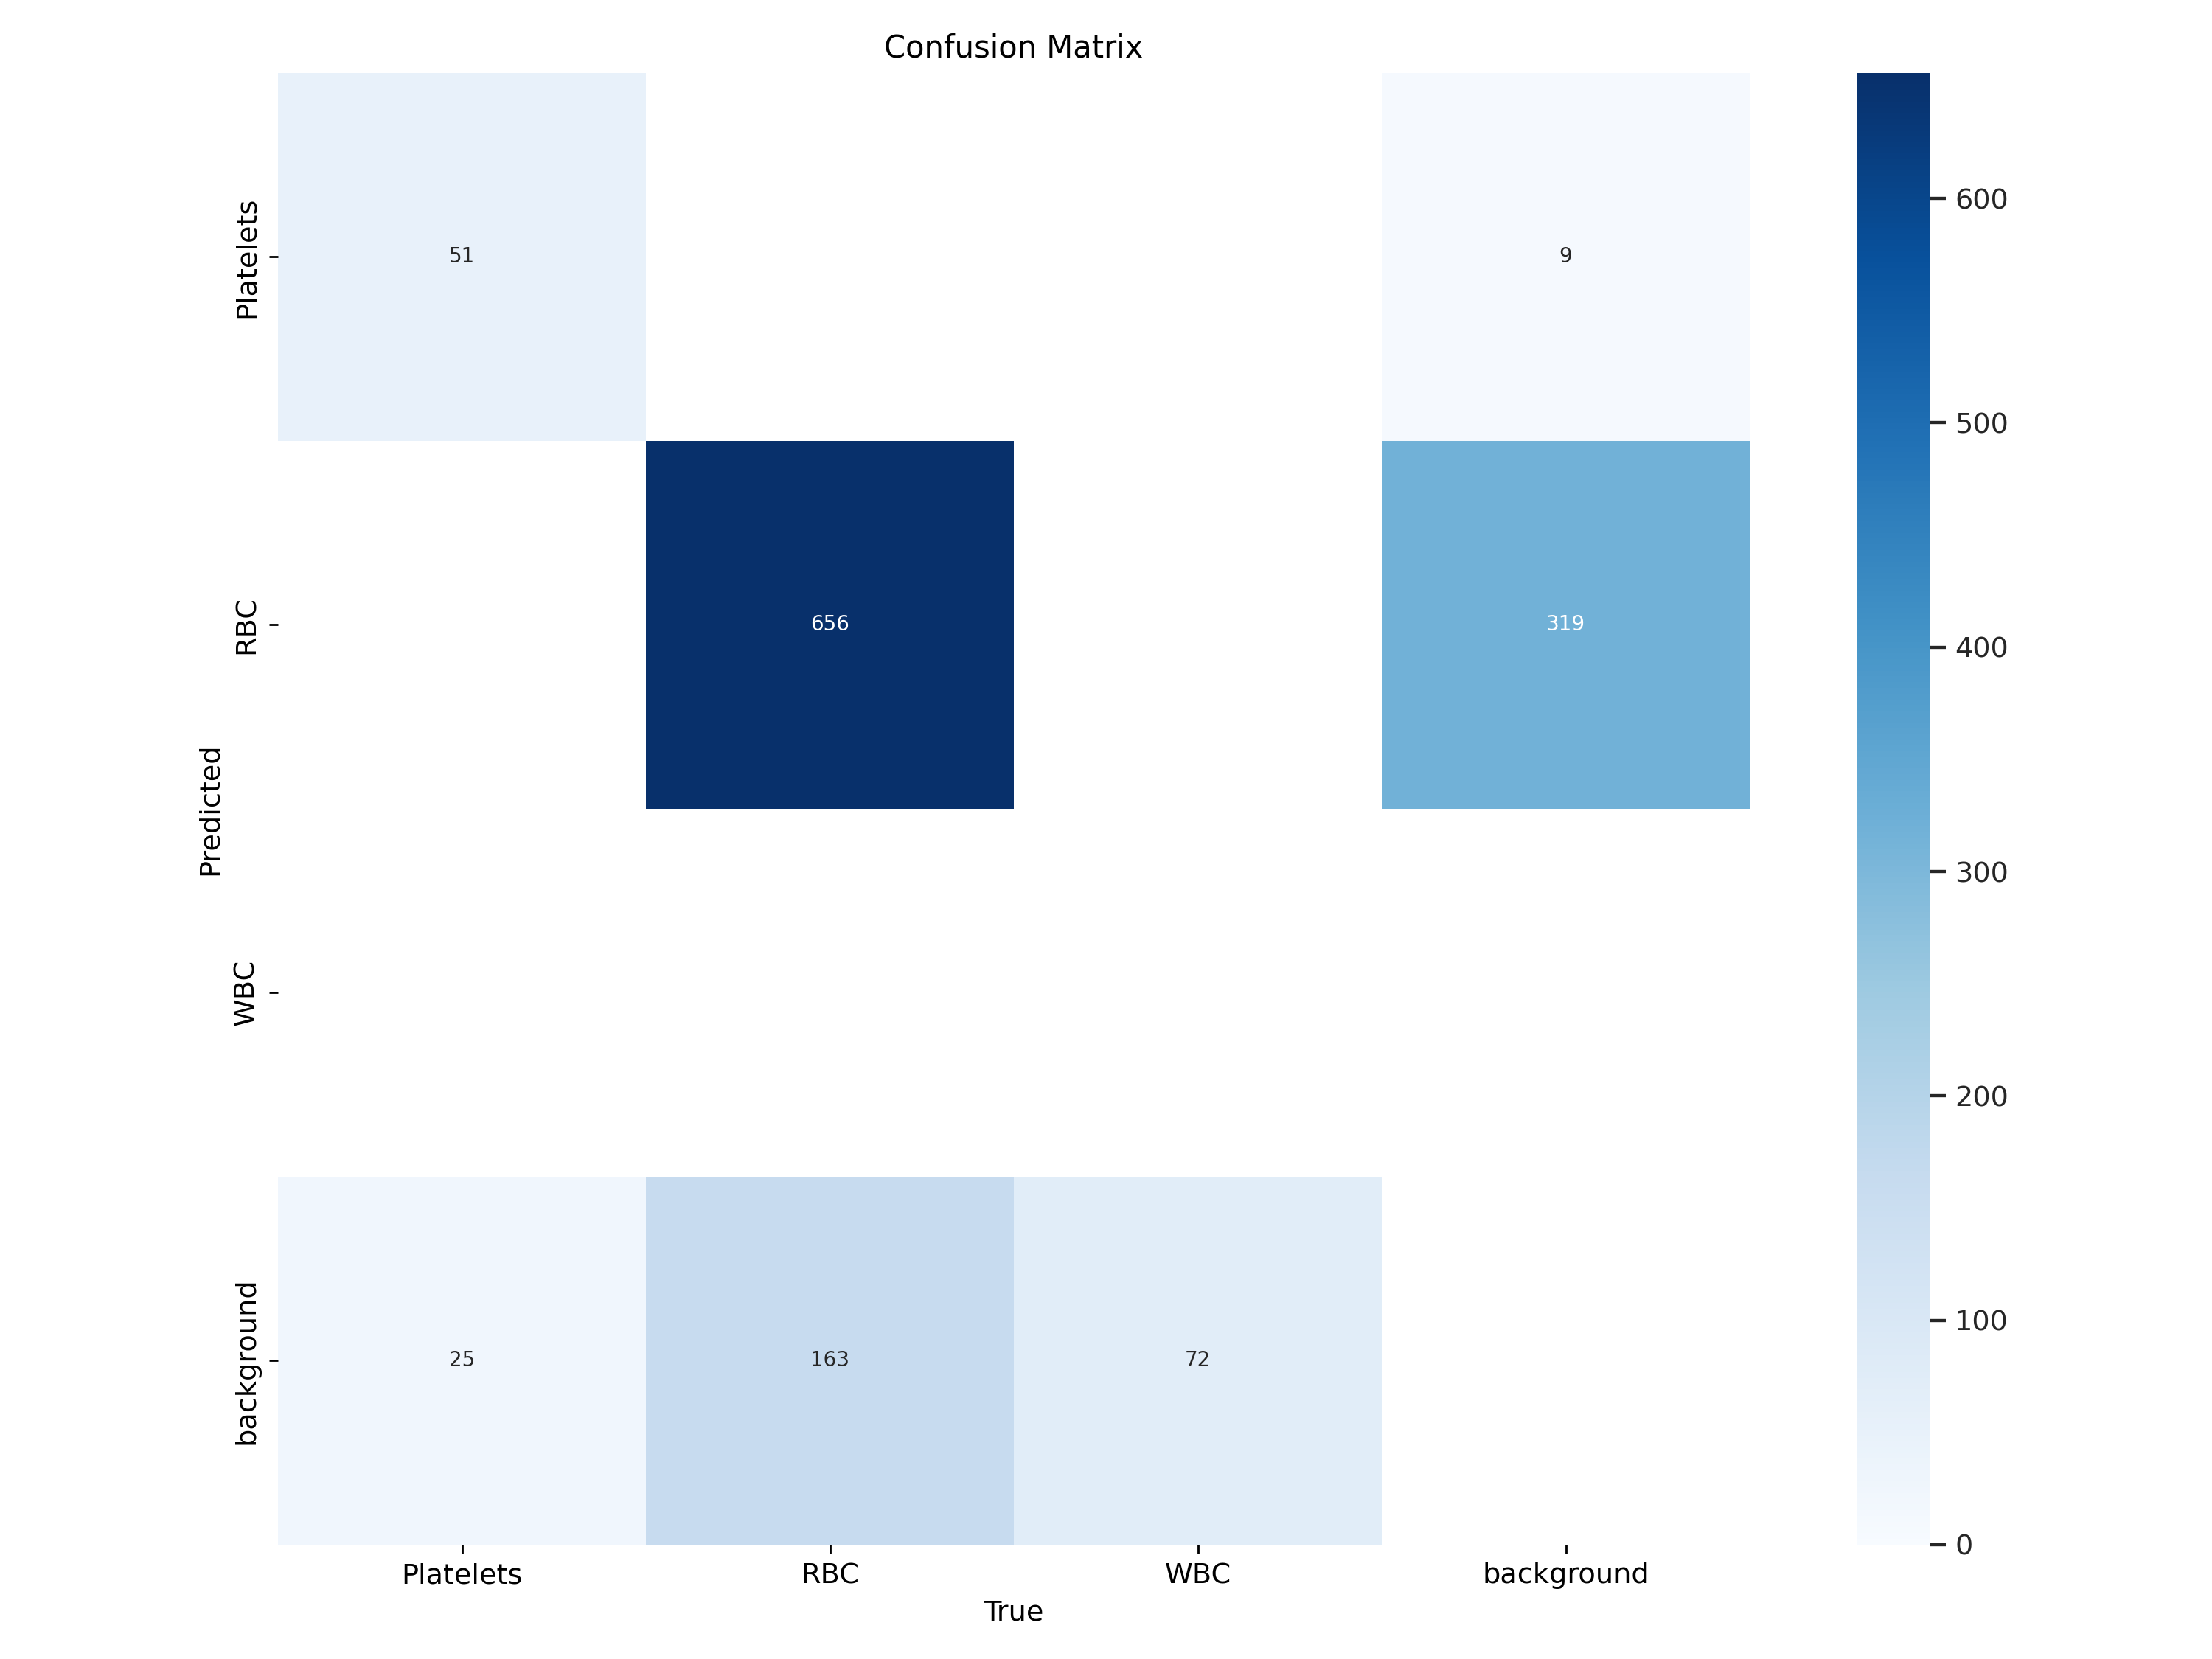

In [7]:
#runs/detect/V9/train_0605_BL

Image(filename= f'runs/detect/V9/train_0605_BL/confusion_matrix.png', width =800)

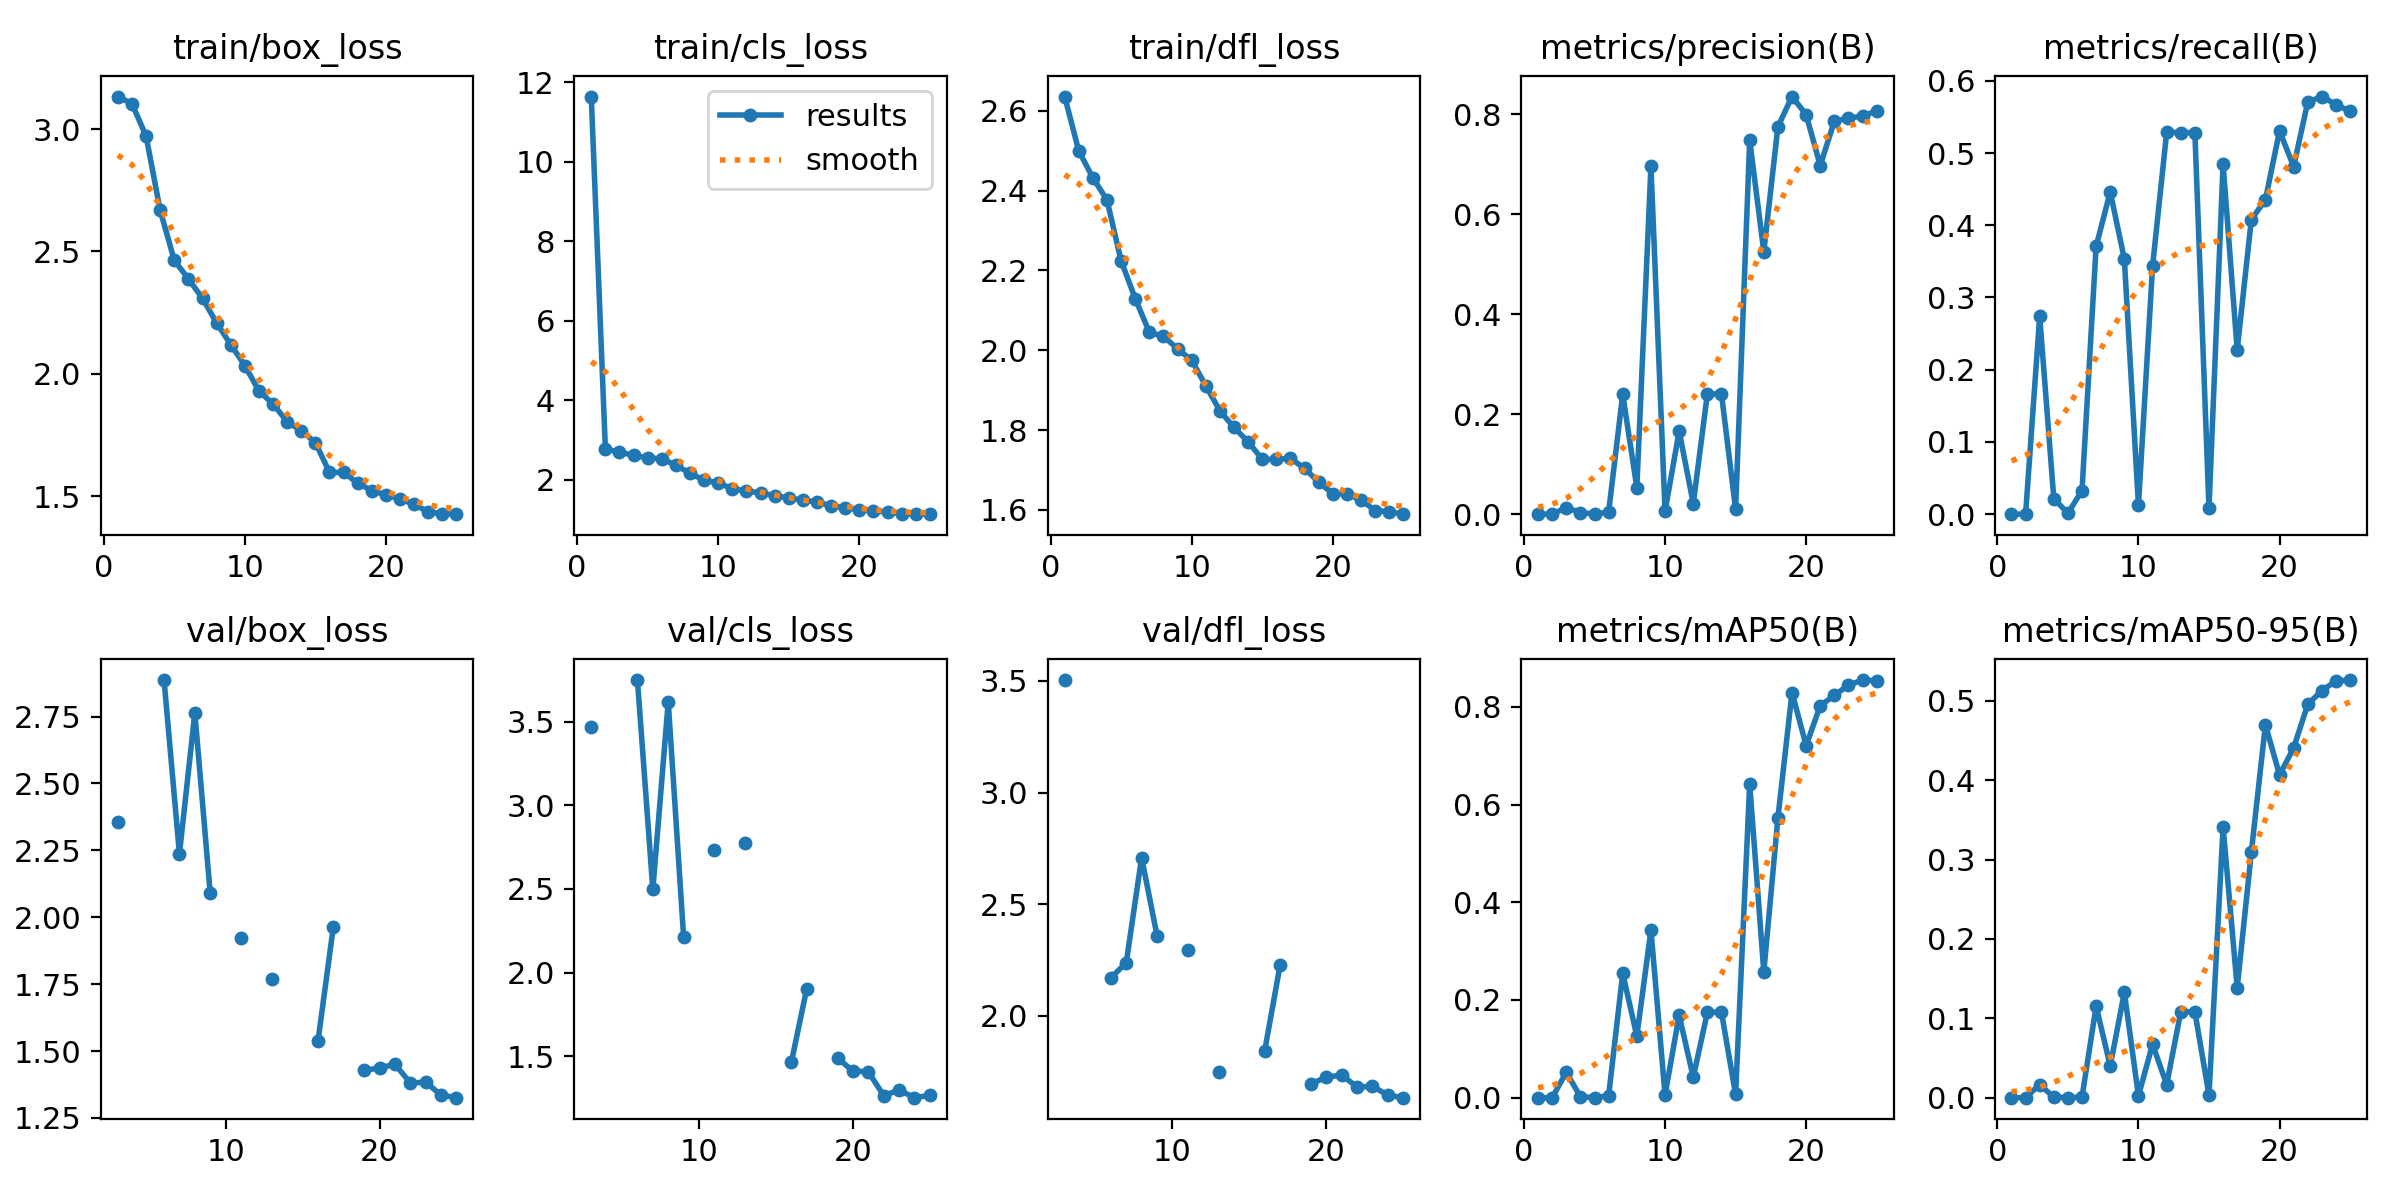

In [8]:
Image(filename= f'runs/detect/V9/train_0605_BL/results.png', width =750)

In [9]:
BL_val = YOLO('runs/detect/V9/train_0605_BL/weights/best.pt')
BL_val.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]


                   all         73        967      0.808      0.558      0.853      0.526
             Platelets         73         76      0.845      0.789      0.849      0.372
                   RBC         73        819      0.578      0.867      0.797      0.522
                   WBC         73         72          1     0.0176      0.913      0.683
Speed: 0.1ms preprocess, 6.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x14cbf771b4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## Hyper Parameter Tuning

In [12]:
HP_model =YOLO('yolov9c.pt')
HP_tune = HP_model.tune(data = 'DATA/data.yaml', epochs = 25)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=tra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.386      1.675      1.544        247        640: 100%|██████████| 48/48 [00:15<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]


                   all         73        967      0.595      0.866      0.848      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.266     0.9866      1.375        267        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.843      0.512      0.739      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G       1.25     0.9594      1.369        225        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967      0.686      0.507       0.71       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.256      0.955      1.378        254        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967      0.658      0.765      0.792      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.5G      1.216     0.8952      1.355        328        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967       0.79      0.915      0.892      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.175     0.8664      1.321        231        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.785      0.925      0.883      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.179      0.845      1.318        195        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.757      0.838      0.875      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.167     0.8303      1.316        342        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967      0.804      0.878      0.893      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.157     0.8113      1.295        296        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967       0.75      0.795      0.857      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G       1.14     0.7897       1.29        250        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.809      0.914      0.899      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.121     0.7922      1.282        331        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.776      0.923      0.889      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.129     0.7919       1.28        327        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]


                   all         73        967      0.818      0.902      0.898      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.6G      1.131     0.7837      1.274        287        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.838      0.914      0.917      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.121     0.7701      1.284        327        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.819      0.917      0.902      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.091      0.743      1.257        220        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.842      0.887      0.915      0.615
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.098     0.7231      1.313        152        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.871      0.881      0.921      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.096     0.7207      1.323        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.827      0.903      0.905      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.075     0.7035      1.305        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.846      0.906      0.918      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.079     0.6992      1.302        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.841      0.912      0.922      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G      1.059     0.6788      1.287        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.828      0.926      0.922      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      1.059     0.6728      1.307        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.854      0.913      0.924      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G      1.051     0.6561      1.295        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.87      0.887       0.93      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      1.028     0.6414      1.283        159        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.865      0.903      0.927      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      1.007     0.6238      1.263        186        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.861      0.916      0.926      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9964     0.6165      1.252        201        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.883       0.87      0.923      0.657

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]


                   all         73        967      0.861      0.911      0.927      0.663
             Platelets         73         76      0.855      0.856       0.91      0.503
                   RBC         73        819      0.761      0.878      0.893       0.65
                   WBC         73         72      0.968          1      0.979      0.835
Speed: 0.1ms preprocess, 5.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (403.34s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.68899 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.86518, 'metrics/recall(B)': 0.9026, 'metrics/mAP50(B)': 0.92738, 'metrics/mAP50-95(B)': 0.6625, 'val/box_loss': 1.08918, 'val/cls_loss': 0.6672, 'val/dfl_loss': 1.30684, 'fitness': 0.

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0101' and 'momentum=0.94957' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.253       1.68      1.564        248        640: 100%|██████████| 48/48 [00:15<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]


                   all         73        967      0.541      0.687      0.653      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.143     0.9987      1.412        267        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.688       0.69       0.74      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.125     0.9449      1.393        222        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.585      0.884      0.837      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.128     0.9169        1.4        256        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.702      0.815      0.806      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.5G      1.101     0.8938      1.368        330        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.778      0.853      0.883      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.074     0.8777      1.346        230        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967      0.802      0.899       0.89      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.069     0.8484      1.337        200        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]


                   all         73        967      0.841      0.893      0.906      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.061     0.8317      1.336        344        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.749      0.897      0.865      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.051     0.8126      1.319        300        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.825      0.931      0.909      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.062     0.8049      1.334        254        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.846      0.893      0.908      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.031     0.7961      1.316        331        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]


                   all         73        967      0.804      0.891      0.899       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.012     0.7793      1.293        330        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.819      0.922      0.916      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.002     0.7653      1.279        287        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.863      0.862      0.919      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.017     0.7674      1.295        323        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.808      0.886      0.888      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G     0.9925     0.7546      1.277        221        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.859      0.895      0.911      0.636
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.004     0.7254      1.326        152        640: 100%|██████████| 48/48 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.95it/s]


                   all         73        967       0.81      0.922      0.923      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G     0.9953     0.7218      1.335        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967      0.871      0.898       0.93      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9919     0.7136       1.33        170        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.885      0.858      0.925       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9885     0.6899      1.317        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.836      0.905      0.924      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9625     0.6787      1.299        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.827      0.904      0.919      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      0.957     0.6694       1.31        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.823      0.934      0.924      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9438     0.6544      1.297        167        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.859      0.905      0.936      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9352     0.6409      1.291        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.874      0.883       0.93      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9163     0.6209      1.275        185        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.867      0.893      0.931      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9084     0.6213      1.265        201        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.896      0.867      0.933      0.664

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 51.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


                   all         73        967      0.895      0.867      0.933      0.664
             Platelets         73         76      0.852      0.855      0.917      0.517
                   RBC         73        819      0.866      0.745      0.898      0.643
                   WBC         73         72      0.968          1      0.984      0.834
Speed: 0.1ms preprocess, 5.1ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train3
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 2/10 iterations complete ✅ (808.12s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69129 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.89596, 'metrics/recall(B)': 0.86666, 'metrics/mAP50(B)': 0.93282, 'metrics/mAP50-95(B)': 0.66446, 'val/box_loss': 0.99735, 'val/cls_loss': 0.63809, 'val/dfl_loss': 1.32111, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01125' and 'momentum=0.96281' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00047), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.423      1.601      1.579        248        640: 100%|██████████| 48/48 [00:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


                   all         73        967      0.516      0.848      0.741      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.315     0.9724      1.406        267        640: 100%|██████████| 48/48 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967       0.51      0.596      0.617      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.284     0.9076      1.387        222        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]


                   all         73        967      0.661      0.564      0.615      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.313     0.9092      1.411        256        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967      0.724      0.778      0.809      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.5G      1.249     0.8555      1.369        330        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967      0.755      0.942        0.9      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.229     0.8376       1.35        230        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.801      0.901      0.898      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.226     0.8179      1.344        199        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.814      0.898      0.899      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G       1.22     0.7949      1.341        343        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.821      0.932      0.914      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.193     0.7638       1.31        300        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.847      0.881      0.903       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.182     0.7578      1.315        254        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.81      0.931      0.917      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.183     0.7589      1.316        331        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.818      0.909      0.914      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.176     0.7535      1.303        329        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.839      0.875      0.909      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.153     0.7273      1.283        287        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.852      0.891      0.914      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.161     0.7336      1.302        323        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.827       0.88      0.898      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.139      0.715      1.281        221        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.821      0.903      0.913      0.621
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.136     0.6879      1.324        152        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.844      0.911       0.92      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.141      0.678      1.336        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967       0.85      0.883      0.914      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.127     0.6763      1.325        170        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.861      0.895       0.92       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.124     0.6625      1.318        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.869      0.868      0.922      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G        1.1     0.6507      1.302        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.849      0.893      0.917       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      1.095     0.6395      1.312        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.881      0.865      0.917      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G      1.086     0.6324      1.303        167        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.858      0.877       0.92      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      1.068     0.6182      1.293        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.861       0.91      0.928      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      1.048     0.5966      1.277        185        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.873       0.87      0.925      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G      1.044     0.5963      1.269        201        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.868      0.888      0.922      0.662

25 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 51.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


                   all         73        967       0.87      0.888      0.922      0.662
             Platelets         73         76      0.842      0.816       0.88      0.503
                   RBC         73        819      0.801      0.847      0.905      0.654
                   WBC         73         72      0.968          1      0.982      0.828
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train4
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 3/10 iterations complete ✅ (1216.58s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69129 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.89596, 'metrics/recall(B)': 0.86666, 'metrics/mAP50(B)': 0.93282, 'metrics/mAP50-95(B)': 0.66446, 'val/box_loss': 0.99735, 'val/cls_loss': 0.63809, 'val/dfl_loss': 1.32111, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.012' and 'momentum=0.95616' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00055), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.268      1.845      1.551        252        640: 100%|██████████| 48/48 [00:15<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         73        967      0.676       0.68      0.722      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.152      1.108      1.379        269        640: 100%|██████████| 48/48 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967      0.612      0.744      0.727      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.148      1.089      1.374        220        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967       0.48      0.802      0.762      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.152      1.063      1.365        262        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


                   all         73        967      0.773      0.923      0.891      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.4G      1.127      1.001       1.35        335        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.782      0.848      0.868      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.094     0.9689      1.326        232        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.666      0.821      0.842      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.088     0.9453      1.309        202        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.819      0.902      0.908      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G      1.076     0.9241      1.305        349        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967      0.808      0.944      0.906      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.061     0.9036      1.289        308        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.832      0.903      0.917      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.068     0.8885      1.293        259        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.807      0.901        0.9      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.046     0.8843      1.284        340        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.804      0.845      0.893      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.034      0.874      1.274        345        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.816      0.895      0.913      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.022     0.8649      1.256        292        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.798      0.938      0.903      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G       1.03     0.8437      1.271        335        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.833      0.905       0.91      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.009     0.8236      1.253        224        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.792      0.843      0.866      0.563
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.016     0.8044      1.298        149        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.847      0.924      0.923      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.012     0.7887       1.31        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.844      0.901       0.91      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.002      0.782        1.3        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.849      0.896      0.922      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9952     0.7553      1.285        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.861      0.878      0.919      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9763     0.7515      1.269        162        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967       0.81      0.927      0.919      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9739     0.7368      1.283        146        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967      0.861      0.901      0.924       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9611      0.725      1.271        163        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.837      0.924      0.925      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9501     0.7085      1.265        157        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.849       0.91      0.931      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      0.935     0.6894      1.249        180        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.851      0.909      0.928      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9259     0.6875       1.24        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.871        0.9      0.934      0.669

25 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 51.6MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]


                   all         73        967      0.871        0.9      0.933      0.669
             Platelets         73         76      0.821      0.908      0.917      0.519
                   RBC         73        819      0.823      0.793      0.896      0.649
                   WBC         73         72      0.968          1      0.987      0.841
Speed: 0.1ms preprocess, 6.8ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs/detect/train5
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 4/10 iterations complete ✅ (1625.62s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01222' and 'momentum=0.97805' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00045), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.469      1.845      1.552        256        640: 100%|██████████| 48/48 [00:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]


                   all         73        967      0.257       0.77      0.332      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.359      1.122      1.382        274        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]


                   all         73        967       0.13      0.268     0.0542       0.03

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.331      1.079      1.393        215        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]


                   all         73        967      0.602      0.803      0.842      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.365      1.085      1.433        264        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


                   all         73        967      0.655      0.855      0.806      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.3G      1.304      1.015      1.395        343        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.656      0.782      0.745      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.284     0.9946      1.373        236        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967        0.8      0.924       0.89      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.275     0.9666      1.371        203        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.805      0.922      0.901      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.268     0.9325      1.352        349        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.755      0.846      0.858      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.256     0.9173      1.341        315        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.83      0.882       0.89      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.245     0.8972      1.331        263        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.783      0.931      0.886       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.231     0.8944      1.333        346        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.831      0.905        0.9      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.206     0.8804      1.308        350        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.836      0.903      0.904      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.189     0.8553      1.298        297        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.807        0.9      0.891      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G       1.21     0.8459      1.318        340        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.794      0.908      0.892      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.177     0.8228      1.301        225        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.843      0.898      0.906      0.622
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.196      0.816      1.346        149        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.837      0.912      0.922      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.193     0.8028      1.339        176        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.798      0.897      0.912      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.187     0.8101      1.341        168        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.817      0.953      0.923       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.173     0.7847      1.331        159        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.818      0.906      0.914      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G      1.161     0.7692      1.321        161        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967       0.85      0.894      0.926      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      1.149      0.751      1.323        144        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.872      0.873      0.921      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G      1.142     0.7386      1.312        162        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.853      0.894      0.918      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      1.127     0.7273      1.314        157        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967      0.839      0.927      0.916      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      1.103     0.7126      1.291        178        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.844      0.901      0.917      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G      1.094     0.6944      1.281        198        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.825      0.919      0.917      0.658

25 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 51.6MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]


                   all         73        967      0.845      0.901      0.917      0.663
             Platelets         73         76      0.792      0.882      0.893      0.512
                   RBC         73        819      0.786      0.822      0.884      0.642
                   WBC         73         72      0.958          1      0.973      0.834
Speed: 0.1ms preprocess, 7.5ms inference, 0.2ms loss, 8.8ms postprocess per image
Results saved to runs/detect/train6
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 5/10 iterations complete ✅ (2035.65s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01144' and 'momentum=0.95544' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00055), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.135      1.666      1.526        251        640: 100%|██████████| 48/48 [00:15<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]


                   all         73        967      0.645       0.74      0.804      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.052      1.021      1.376        270        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967      0.609      0.737      0.795      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.036      1.003      1.372        221        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.733      0.864      0.852      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.024     0.9595      1.366        261        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]


                   all         73        967      0.797       0.87      0.875      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.4G      1.014     0.9216       1.36        335        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.772      0.789      0.824      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G     0.9824     0.9075      1.323        230        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.789      0.916      0.917      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G     0.9923     0.8826      1.329        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.824      0.896      0.902      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G     0.9635     0.8457       1.31        348        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.808      0.924      0.906      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      0.951     0.8329      1.281        307        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.825      0.925      0.906      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G     0.9423     0.8088      1.279        256        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.803      0.906      0.893      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G     0.9347     0.8099      1.276        340        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.805       0.92      0.897      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G     0.9369     0.8067      1.277        339        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.835      0.888      0.906      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G     0.9117     0.7944       1.25        292        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.788      0.937      0.905      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G     0.9195     0.7764      1.265        335        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.809      0.903      0.919      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G     0.9069     0.7615      1.253        223        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967       0.81      0.877      0.903      0.586
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G     0.9062     0.7352      1.295        150        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.827      0.939      0.924      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G     0.9096     0.7295      1.305        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.808       0.93      0.918      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9028     0.7307        1.3        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967       0.83      0.854      0.905      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9004      0.704      1.287        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967       0.84      0.896      0.923      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.8782     0.6934       1.27        162        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.842      0.897       0.92       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.8725     0.6801      1.281        146        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]


                   all         73        967      0.819      0.935      0.918      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.8621     0.6652      1.268        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]


                   all         73        967      0.849      0.905      0.925       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.8486     0.6515      1.259        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.832      0.914      0.927      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.8349     0.6319      1.243        184        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967       0.87      0.878      0.923      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.8307     0.6297       1.23        173        640:  40%|███▉      | 19/48 [00:05<00:08,  3.56it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.169      1.063      1.316        270        640: 100%|██████████| 48/48 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]


                   all         73        967      0.577      0.413       0.54      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G       1.16      1.022      1.296        219        640: 100%|██████████| 48/48 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         73        967      0.716      0.862       0.87      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.158      1.015      1.308        254        640: 100%|██████████| 48/48 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.766      0.955      0.895      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.4G       1.12      0.952      1.282        333        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.764      0.922      0.876      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.095     0.9182      1.254        233        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]


                   all         73        967      0.757      0.929        0.9      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.086     0.9102      1.243        202        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         73        967       0.84        0.9      0.905      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G      1.086     0.8953       1.25        343        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         73        967      0.805        0.9      0.892      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.074     0.8549      1.225        301        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.821      0.875      0.887      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.062     0.8382      1.229        253        640: 100%|██████████| 48/48 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.804      0.868      0.883      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.037      0.833      1.213        334        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.802      0.919      0.906      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.034     0.8286      1.206        331        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


                   all         73        967      0.819       0.92       0.91      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.029     0.8077        1.2        290        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.834      0.906      0.907      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.036     0.8045      1.209        326        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.814      0.879      0.897      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G       1.01     0.7841      1.187        220        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.842      0.904      0.906      0.641
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.011     0.7563      1.226        151        640: 100%|██████████| 48/48 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.853      0.906      0.922      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.004     0.7465      1.234        177        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.846      0.887      0.916      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9923      0.738      1.223        171        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.819      0.923      0.918      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9929     0.7205      1.218        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.836      0.913      0.926      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9789     0.7101      1.206        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.839      0.911      0.916       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9623     0.6928      1.211        149        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.856       0.91      0.929      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9551     0.6829      1.203        168        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.861      0.897      0.927      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      0.953     0.6717      1.197        158        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.864      0.913      0.931      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9253     0.6474      1.176        185        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.867       0.88      0.928      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9209     0.6354       1.17        201        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.849       0.91      0.927       0.66

25 epochs completed in 0.107 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 51.6MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


                   all         73        967      0.851      0.909      0.928      0.661
             Platelets         73         76      0.804      0.895      0.909      0.506
                   RBC         73        819      0.783      0.833      0.889       0.64
                   WBC         73         72      0.966          1      0.985      0.835
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/train8
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 7/10 iterations complete ✅ (2846.27s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00848' and 'momentum=0.89008' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0006), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.256       2.03      1.233        225        640: 100%|██████████| 48/48 [00:16<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]


                   all         73        967       0.42      0.802      0.499      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.6G      1.184      1.238      1.146        251        640: 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.682      0.769      0.806      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.156      1.192      1.126        188        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.722      0.795       0.83      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.135      1.137      1.123        288        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


                   all         73        967      0.674      0.878       0.87      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.6G      1.125      1.098      1.131        282        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]


                   all         73        967      0.842      0.721      0.842       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.085      1.044      1.086        249        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967       0.84      0.871      0.889      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.069       1.05      1.066        215        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.661      0.777      0.775      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G      1.073       1.02      1.077        232        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.829       0.88      0.906      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.061     0.9923      1.073        280        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.787      0.893        0.9      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.049     0.9714      1.063        217        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.786      0.908      0.905      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.033     0.9457      1.052        226        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.831        0.9      0.912       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.6G      1.033     0.9481      1.039        258        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.847      0.901      0.925      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.033      0.943      1.047        217        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.816      0.917      0.905      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.032     0.9183       1.04        217        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.844      0.877      0.906      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.6G      1.018     0.9164      1.045        179        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967        0.8      0.874      0.878      0.606
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.007     0.8624      1.043        151        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.844      0.869      0.917      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.005     0.8565      1.046        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.838      0.908      0.912      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G     0.9976     0.8451      1.038        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.803      0.928      0.916      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G     0.9904     0.8278       1.03        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.803      0.922      0.914      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9776     0.8229      1.026        165        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.865      0.885      0.924      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G      0.972     0.8123      1.033        147        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.872      0.875       0.93       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9619     0.7896      1.027        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.857      0.894      0.926      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9512     0.7779      1.021        159        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.857      0.904      0.928      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G      0.938     0.7573      1.004        183        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.867      0.885      0.922      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9295     0.7512          1        200        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]


                   all         73        967      0.868       0.88      0.924      0.664

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 51.6MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all         73        967      0.852      0.909      0.928      0.666
             Platelets         73         76      0.783      0.903      0.899      0.522
                   RBC         73        819      0.807      0.823      0.896       0.65
                   WBC         73         72      0.966          1      0.989      0.826
Speed: 0.1ms preprocess, 5.2ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train9
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 8/10 iterations complete ✅ (3250.17s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness':

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.012' and 'momentum=0.97019' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00059), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G       1.28      1.841      1.422        253        640: 100%|██████████| 48/48 [00:15<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]


                   all         73        967      0.645      0.874      0.849      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.7G      1.191      1.138      1.289        271        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.493        0.8      0.522      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.169      1.054      1.287        218        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]


                   all         73        967      0.599      0.747      0.784      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.182      1.068      1.303        264        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]


                   all         73        967      0.657       0.85      0.845      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.2G       1.13     0.9856      1.264        342        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.809      0.914      0.896      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.113     0.9622      1.253        233        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         73        967      0.814      0.916      0.904      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.101     0.9314      1.245        202        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.844      0.877      0.907      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.7G       1.11      0.924      1.246        347        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]


                   all         73        967      0.807      0.895      0.903      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.099     0.9041      1.228        312        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.82      0.909      0.909      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.071     0.8654      1.223        260        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967       0.84      0.892      0.902      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.058     0.8849      1.223        344        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.782      0.907      0.905      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.7G      1.054     0.8749      1.208        349        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967       0.84       0.91      0.919       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G       1.04     0.8417      1.194        297        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


                   all         73        967      0.851      0.905       0.91      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.059      0.838      1.222        340        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]


                   all         73        967      0.805       0.92      0.907      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.7G      1.031     0.8182      1.201        224        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.841      0.898      0.912      0.625
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.031     0.7997      1.232        149        640: 100%|██████████| 48/48 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.839      0.939      0.929      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.044     0.7951      1.239        176        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.847      0.879      0.912       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G      1.025     0.7924      1.237        169        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]


                   all         73        967      0.861      0.893      0.919      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.017     0.7612      1.222        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.855      0.901      0.919      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G      0.999     0.7498      1.213        161        640: 100%|██████████| 48/48 [00:13<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         73        967      0.848      0.918      0.922      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9958     0.7357      1.219        144        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.868      0.913      0.922      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9865     0.7276        1.2        163        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.865      0.903      0.929       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G     0.9762     0.7062      1.195        157        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.859      0.898      0.918      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9573     0.6906       1.18        179        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.856      0.907      0.923      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G     0.9508     0.6822      1.178        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.876      0.881      0.927      0.661

25 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 51.6MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


                   all         73        967      0.875      0.881      0.927      0.661
             Platelets         73         76      0.836      0.855      0.904      0.511
                   RBC         73        819      0.823      0.789      0.895      0.646
                   WBC         73         72      0.965          1      0.982      0.826
Speed: 0.1ms preprocess, 7.2ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/train10
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 9/10 iterations complete ✅ (3654.74s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness'

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00843' and 'momentum=0.88422' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00061), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.5G      1.257      2.046       1.26        226        640: 100%|██████████| 48/48 [00:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         73        967      0.615      0.773      0.669      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.6G       1.18      1.269      1.149        250        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


                   all         73        967      0.565      0.464      0.467       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.7G      1.179      1.203      1.123        187        640: 100%|██████████| 48/48 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.714      0.739       0.83      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.7G      1.177      1.172      1.137        291        640: 100%|██████████| 48/48 [00:13<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


                   all         73        967      0.691      0.845      0.806      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.7G      1.123      1.113      1.112        287        640: 100%|██████████| 48/48 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.776      0.865      0.867      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.7G      1.101      1.071      1.082        275        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.807       0.86       0.85       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.7G      1.095      1.078      1.076        220        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.791      0.851      0.875      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.6G      1.093      1.054      1.079        233        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.824      0.875      0.896      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.7G      1.059     0.9999      1.062        241        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         73        967      0.814      0.893       0.91      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.7G      1.047      1.007      1.044        298        640: 100%|██████████| 48/48 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.802      0.889      0.897      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.7G      1.049     0.9821      1.045        173        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


                   all         73        967      0.835      0.889      0.904      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.6G      1.039     0.9707       1.05        256        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.839      0.869      0.905      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.7G      1.037     0.9743      1.036        303        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.838      0.891      0.913      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.7G      1.037      0.957      1.026        247        640: 100%|██████████| 48/48 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.808      0.928      0.905      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.6G      1.029     0.9547      1.038        210        640: 100%|██████████| 48/48 [00:13<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]


                   all         73        967      0.836      0.903      0.914      0.636
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.6G      1.023     0.8869       1.05        150        640: 100%|██████████| 48/48 [00:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]


                   all         73        967      0.841      0.931      0.918      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.6G      1.005      0.872      1.054        176        640: 100%|██████████| 48/48 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


                   all         73        967      0.867      0.891      0.927      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.6G          1     0.8689      1.046        169        640: 100%|██████████| 48/48 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967       0.82      0.898      0.912        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.6G      1.001     0.8607       1.04        160        640: 100%|██████████| 48/48 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.855      0.891      0.918      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.6G     0.9822     0.8435      1.028        162        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


                   all         73        967      0.838      0.897      0.917      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.6G     0.9821     0.8161      1.038        146        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.861      0.885      0.928      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.6G     0.9712     0.8114      1.028        164        640: 100%|██████████| 48/48 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]


                   all         73        967      0.862       0.91      0.927      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.6G      0.961     0.7973      1.026        157        640: 100%|██████████| 48/48 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


                   all         73        967      0.857      0.906      0.923      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.6G     0.9435     0.7814      1.011        182        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]


                   all         73        967      0.848      0.896      0.916      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.6G      0.936     0.7735      1.003        199        640: 100%|██████████| 48/48 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         73        967      0.866      0.885      0.922      0.661

25 epochs completed in 0.107 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 51.6MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


                   all         73        967      0.857      0.906      0.923      0.663
             Platelets         73         76      0.808      0.868      0.898      0.511
                   RBC         73        819      0.796       0.85      0.898      0.655
                   WBC         73         72      0.967          1      0.974      0.822
Speed: 0.1ms preprocess, 6.4ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train11
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 10/10 iterations complete ✅ (4062.17s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.69567 observed at iteration 4
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.87094, 'metrics/recall(B)': 0.90034, 'metrics/mAP50(B)': 0.93351, 'metrics/mAP50-95(B)': 0.66925, 'val/box_loss': 0.98876, 'val/cls_loss': 0.69557, 'val/dfl_loss': 1.2653, 'fitness

In [15]:
HP_best_params ={
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov9c.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True
    ,'lr0': 0.012
,'lrf': 0.00953
,'momentum': 0.95616
,'weight_decay': 0.00055
,'warmup_epochs': 2.89036
,'warmup_momentum': 0.7679
,'box': 6.89819
,'cls': 0.54484
,'dfl': 1.47846
,'hsv_h': 0.01551
,'hsv_s': 0.79874
,'hsv_v': 0.37483
,'degrees': 0.0
,'translate': 0.09989
,'scale': 0.54783
,'shear': 0.0
,'perspective': 0.0
,'flipud': 0.0
,'fliplr': 0.38949
,'bgr': 0.0
,'mosaic': 1.0
,'mixup': 0.0
,'copy_paste': 0.0}


In [17]:
HP_best_mod = YOLO('runs/detect/V9/Tuned_HP_0605/tune2/weights/best.pt')
HP_best_results = HP_best_mod.train(**HP_best_params)

New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.012, momentum=0.95616) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.00055), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       5.5G      1.312      1.338      1.361        252        416: 100%|██████████| 48/48 [00:08<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]

                   all         73        967   0.000882    0.00463   0.000442   0.000177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.72G      1.267      1.193      1.367        268        416: 100%|██████████| 48/48 [00:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]


                   all         73        967   0.000514     0.0324   0.000398    0.00011

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.66G      1.234      1.149      1.347        220        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]

                   all         73        967    0.00516     0.0231    0.00237   0.000807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.72G      1.263      1.153      1.364        261        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         73        967      0.625      0.575      0.634      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.73G      1.182       1.07      1.325        335        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         73        967      0.504      0.653      0.646      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.73G      1.164      1.039      1.301        232        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         73        967      0.665      0.716       0.76      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.71G      1.154      1.028      1.313        202        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]

                   all         73        967      0.722      0.783      0.793      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.68G       1.16      1.011      1.324        349        416: 100%|██████████| 48/48 [00:07<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]

                   all         73        967      0.681      0.853      0.847      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.72G      1.128      0.986      1.289        307        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]

                   all         73        967       0.78      0.862      0.877      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.71G      1.111     0.9594      1.287        260        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all         73        967      0.778      0.885      0.888      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.73G      1.109     0.9564      1.287        340        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]

                   all         73        967      0.708      0.826       0.84      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.73G      1.121     0.9727        1.3        344        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         73        967      0.816      0.897       0.91      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.67G        1.1     0.9554      1.278        292        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]

                   all         73        967      0.833      0.904      0.902      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.71G      1.097     0.9296      1.291        335        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]

                   all         73        967      0.752      0.834      0.843      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.67G       1.09     0.9128      1.275        223        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]

                   all         73        967      0.809       0.93      0.911      0.603


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.65G      1.088     0.9143      1.326        149        416: 100%|██████████| 48/48 [00:08<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         73        967      0.771      0.799      0.809      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.67G      1.078     0.9242      1.316        176        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]

                   all         73        967      0.759      0.877      0.855      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.67G      1.085      0.928      1.333        169        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]

                   all         73        967      0.815      0.791      0.798      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.66G      1.087     0.9009      1.337        160        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         73        967      0.805      0.898      0.889      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.66G      1.077     0.8991      1.317        162        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]

                   all         73        967      0.831      0.864      0.882      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.66G      1.073     0.8876      1.332        146        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]

                   all         73        967      0.856      0.907      0.913      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.67G      1.051     0.8724      1.313        163        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]

                   all         73        967       0.84      0.899      0.914      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.67G      1.035     0.8538      1.303        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all         73        967      0.828      0.915      0.906      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.67G      1.016     0.8202      1.291        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]

                   all         73        967      0.833      0.924      0.916      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.68G      1.011     0.8138      1.277        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]

                   all         73        967      0.846      0.906      0.908      0.638



25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


                   all         73        967      0.833      0.924      0.916      0.648
             Platelets         73         76      0.829      0.882      0.886      0.498
                   RBC         73        819        0.7      0.891      0.879      0.633
                   WBC         73         72       0.97          1      0.982      0.814
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train
